In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
import random
sns.set_theme(style="darkgrid")


In [2]:
data = make_circles(n_samples=100)


## Dataset

In [3]:
X, Y = data
X.shape, Y.shape


((100, 2), (100,))

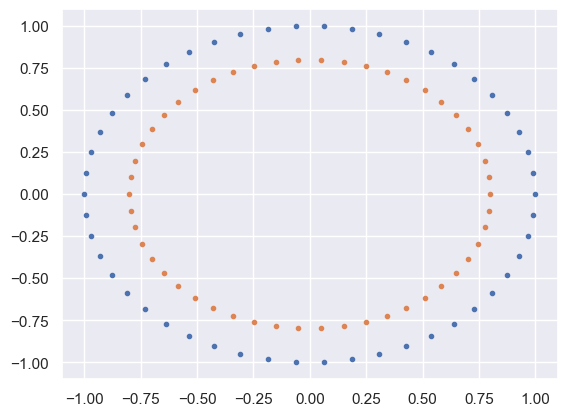

In [4]:
plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], '.')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], '.')

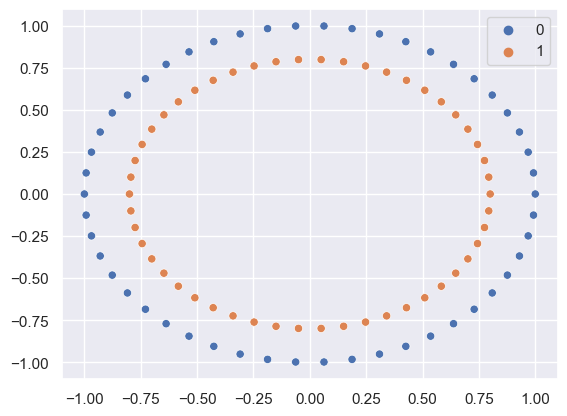

In [5]:
def plot_dataset():
    sns.scatterplot(x=X[:, 0],
                    y=X[:, 1],
                    hue=Y)


plot_dataset()

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


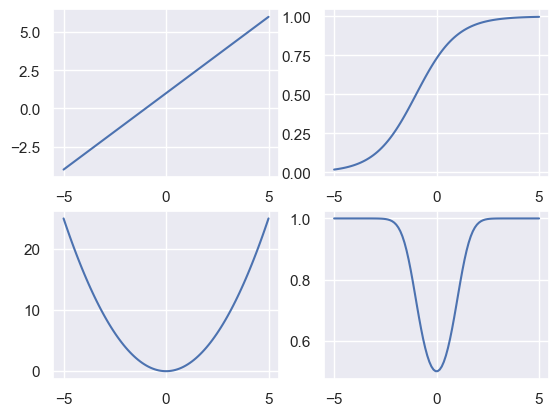

In [7]:
x = np.linspace(-5, 5, 100)
y = x + 1
y2 = x**2

fig, ax = plt.subplots(ncols=2, nrows=2)
ax[0, 0].plot(x, y)

ax[0, 1].plot(x, sigmoid(y))

ax[1, 0].plot(x, y2)

ax[1, 1].plot(x, sigmoid(y2))

## 1. Using simple equation of plane (Scratch)

In [8]:
# logistic regression class
#     cost
#     sigmoid
#     predict
#     train -> gradient descent

In [9]:
a = X[:, 0] * Y
a.shape, Y.shape

((100,), (100,))

In [10]:
class LogisticRegression:

    def __init__(self) -> None:

        # equation to fit -> ax + by + c
        a, b, c = np.random.random(3)
        self.coefficients = [a, b]
        self.intercept = c


    def sigmoid(self,
                x):

        return 1/(1 + np.exp(-x))


    def cost(self,
             y_true,
             y_predicted):
        
        # Here y_predicted is the sigmoid_version

        c0 = y_true * np.log(y_predicted)
        c1 = (1 - y_true) * np.log(1 - y_predicted)
        return -np.sum(c0 + c1)


    def calculate_equation(self,
                           X):
        
        y_predicted = self.coefficients[0] * X[:, 0] + self.coefficients[1] * X[:, 1] + self.intercept
        y_predicted = self.sigmoid(y_predicted)
        return y_predicted

    def predict(self,
                X):
        
        y_predicted = self.calculate_equation(X)
        y_predicted = np.where(y_predicted <= 0.5, 0, 1)
        return y_predicted


    def gradientDescent(self,
                        X, 
                        Y,
                        y_predicted):
        



        dC_Y_hat = y_predicted - Y

        dC_a = np.sum(dC_Y_hat * X[:, 0])
        dC_b = np.sum(dC_Y_hat * X[:, 1])
        dC_c = np.sum(dC_Y_hat)

        param = dict()
        param["da"] = dC_a
        param["db"] = dC_b
        param["dc"] = dC_c

        return param
        

    def train(self,
            X,
            Y,
            stats = None,
            iterations=100,
            alpha=1e-4):

        for i in range(iterations):
            y_predicted = self.calculate_equation(X)
            cost = self.cost(Y, y_predicted)

            # Calculate the gradients
            params = self.gradientDescent(X, Y, y_predicted)

            # Update the parameters
            self.coefficients[0] = self.coefficients[0] - alpha * params["da"]
            self.coefficients[1] = self.coefficients[1] - alpha * params["db"]
            self.intercept = self.intercept - alpha * params["dc"]

            # Updata stats
            if stats:
                stats["cost"].append(cost)





(76.93641736283513, 70.23007490515798)

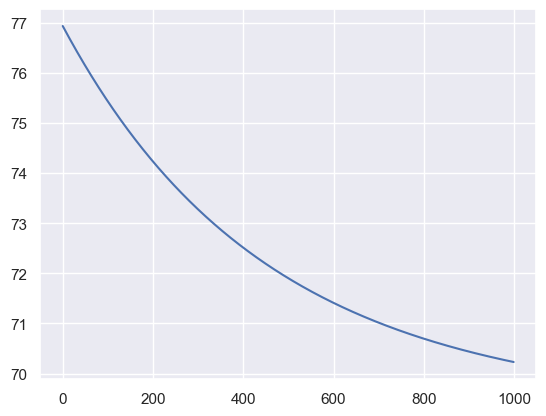

In [11]:
model = LogisticRegression()
stats = dict()
stats["cost"] = []
model.train(X=X,
            Y=Y,
            stats=stats,
            iterations=1000,
            alpha=1e-4)

plt.plot(np.arange(len(stats["cost"])), stats["cost"]);
stats["cost"][0], stats["cost"][-1]

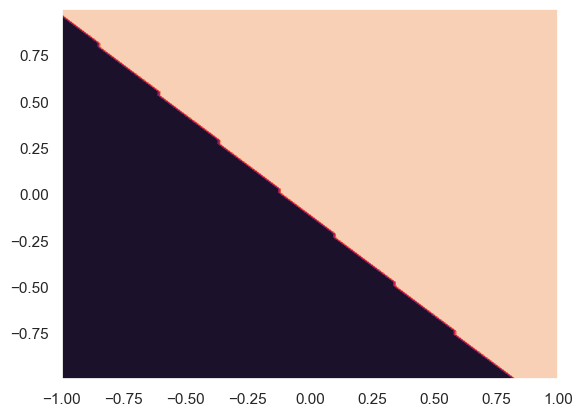

In [12]:
def plotDecisionBoundary(model,
                         X):
    
    xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
    ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])

    x, y = np.meshgrid(np.linspace(xmin, xmax, 100),
                       np.linspace(ymin, ymax, 100))
    
    z = np.c_[np.ravel(x), np.ravel(y)]
    predictions = model.predict(z)

    plt.contourf(x, y, predictions.reshape(x.shape))
    return predictions


preds = plotDecisionBoundary(model,
                     X)


## Observations:

As we are using the equation ax + by + c, it is a equation of a plane
and there is no way it will be able to seperate the dataset cause the dataset
is not linearly seperable.

## 1. Using simple equation of plane (sklearn)

## First just simple logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

In [39]:
model.fit(X, Y)

LogisticRegression(max_iter=10000)

In [40]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
model = LogisticRegression(max_iter=10000)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [15]:
new_x = poly.fit_transform(X)

In [16]:
model.fit(X=new_x, y=Y)

LogisticRegression(max_iter=10000)

In [17]:
model.predict(new_x)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

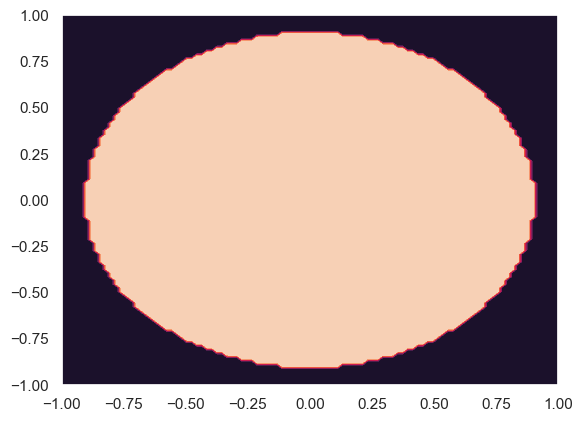

In [18]:
def plotDecisionBoundary(model,
                         X):
    
    xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
    ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])

    x, y = np.meshgrid(np.linspace(xmin, xmax, 100),
                       np.linspace(ymin, ymax, 100))
    
    z = np.c_[np.ravel(x), np.ravel(y)]
    z = poly.fit_transform(z)
    predictions = model.predict(z)

    plt.contourf(x, y, predictions.reshape(x.shape))
    return predictions


preds = plotDecisionBoundary(model,
                     X)

plotDecisionBoundary(model, new_x)

### Now fitting with equation like this -> ax1^2 + bx2^2 + c to visualize it as well 

In [19]:
new_x = X**2
model = LogisticRegression(max_iter=10000).fit(X=new_x, y=Y)

In [20]:
model.predict(new_x)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
model.coef_, model.intercept_

(array([[-3.22816302, -3.22816302]]), array([2.64709599]))

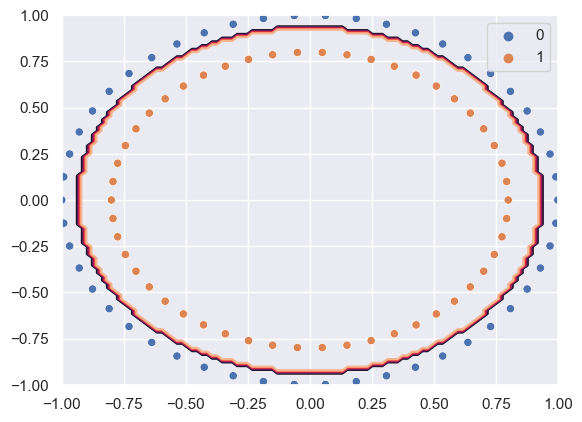

In [22]:
# -3x^2 -3y^2 + 2
plot_dataset()
def func(x, y):
    z = -3 * x **2 - 3 * y**2 + 2.6
    z = sigmoid(z)
    z = np.where(z <=0.5, 0, 1)
    return z 

test_x, test_y = np.meshgrid(np.linspace(-1, 1, 100),
                             np.linspace(-1, 1, 100))

plt.contour(test_x, test_y, func(test_x, test_y))

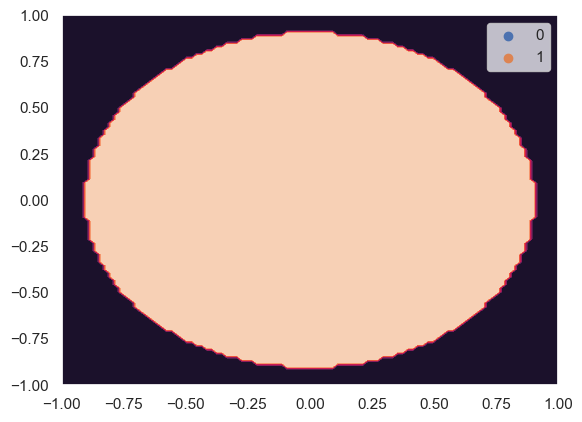

In [23]:
def plotDecisionBoundary(model,
                         x):
    
    """
    The equation we fit here is -> ax1^2 + ax2^2 + c
    so we transformed out X -> X**2 to achieve this..
    Now when predicting, the model will expect out data to be already x^2,
    so we have to pass it that.

    1. Define your boundaries i.e., using meshgrid
    2. Format it in the shape i.e, (m, n) which is z = np.c_.....
    3. Now it is simple x, but the model want x^2, so we have to pass x^2 terms to the 
        model.predict function.
    4. Plot the prediction with the normal x.
    """

    plot_dataset()
    x1, x2 = np.meshgrid(np.linspace(-1, 1, 100),
                         np.linspace(-1, 1, 100))
    
    z = np.c_[np.ravel(x1), np.ravel(x2)]
    z1 = z ** 2
    predictions = model.predict(z1)

    plt.contourf(x1, x2, predictions.reshape(x1.shape))
plotDecisionBoundary(model, new_x)

In [24]:
x1, x2 = np.meshgrid(np.linspace(-1, 1, 100),
                         np.linspace(-1, 1, 100))
    
z = np.c_[np.ravel(x1), np.ravel(x2)]
z.shape, x1.shape, x2.shape

((10000, 2), (100, 100), (100, 100))

### Observations

We can see that to fit a circle like decision boundary we need some more complex function
so when we transformed our X using PolynomialFeatures, which gave us 6 features, we were
able to fit it perfectly. We are also able to fit it perfectly using the equation 
ax1^2 + bx2^2 + c, cause it is a equation of a circle in 2d if you look but in 3d it's
something complex, which you see below :).

## Visualizing out curve in 3d

In [25]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
model.coef_[0], model.intercept_

(array([-3.22816302, -3.22816302]), array([2.64709599]))

Text(0.5, 0.92, 'Plot of sigmoid of z = ax^2 + by^2 + c')

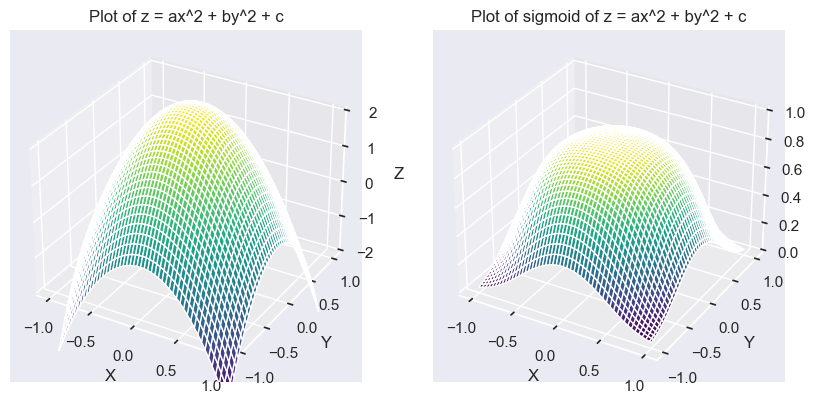

In [27]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = model.coef_[0][0] * x**2 + model.coef_[0][1] * y**2 + model.intercept_

# For the curve
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(x, y, z, cmap="viridis")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(-2, 2)
ax.set_title('Plot of z = ax^2 + by^2 + c');


# For the sigmoid of the curve
sigmoid_z = sigmoid(z)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, sigmoid_z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(0, 1)

ax.set_title('Plot of sigmoid of z = ax^2 + by^2 + c')

### Now Doing the same thing from scratch 😊😊

In [41]:
class LogisticRegression:

    def __init__(self) -> None:

        # equation to fit -> ax + by + c
        a, b, c = np.random.random(3)
        self.coefficients = [a, b]
        self.intercept = c


    def sigmoid(self,
                x):

        return 1/(1 + np.exp(-x))


    def cost(self,
             y_true,
             y_predicted):
        
        # Here y_predicted is the sigmoid_version

        c0 = y_true * np.log(y_predicted)
        c1 = (1 - y_true) * np.log(1 - y_predicted)
        return -np.sum(c0 + c1)


    def calculate_equation(self,
                           X):
        
        y_predicted = self.coefficients[0] * (X[:, 0] ** 2) + self.coefficients[1] * (X[:, 1] ** 2) + self.intercept
        y_predicted = self.sigmoid(y_predicted)
        return y_predicted

    def predict(self,
                X):
        
        y_predicted = self.calculate_equation(X)
        y_predicted = np.where(y_predicted <= 0.5, 0, 1)
        return y_predicted


    def gradientDescent(self,
                        X, 
                        Y,
                        y_predicted):
        



        dC_Y_hat = y_predicted - Y

        dC_a = np.sum(dC_Y_hat * (X[:, 0] ** 2))
        dC_b = np.sum(dC_Y_hat * (X[:, 1] ** 2))
        dC_c = np.sum(dC_Y_hat)

        param = dict()
        param["da"] = dC_a
        param["db"] = dC_b
        param["dc"] = dC_c

        return param
        

    def train(self,
            X,
            Y,
            stats = None,
            iterations=100,
            alpha=1e-4):

        for i in range(iterations):
            y_predicted = self.calculate_equation(X)
            cost = self.cost(Y, y_predicted)

            # Calculate the gradients
            params = self.gradientDescent(X, Y, y_predicted)

            # Update the parameters
            self.coefficients[0] = self.coefficients[0] - alpha * params["da"]
            self.coefficients[1] = self.coefficients[1] - alpha * params["db"]
            self.intercept = self.intercept - alpha * params["dc"]

            # Updata stats
            if stats:
                stats["cost"].append(cost)





(90.50194325573618, 66.8574967414778)

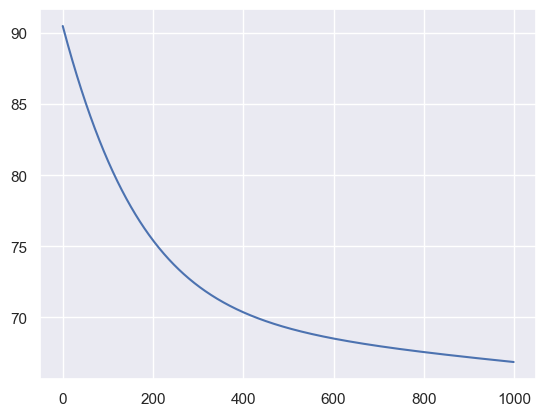

In [42]:
model = LogisticRegression()
stats = dict()
stats["cost"] = []
model.train(X=X,
            Y=Y,
            stats=stats,
            iterations=1000,
            alpha=1e-4)

plt.plot(np.arange(len(stats["cost"])), stats["cost"]);
stats["cost"][0], stats["cost"][-1]

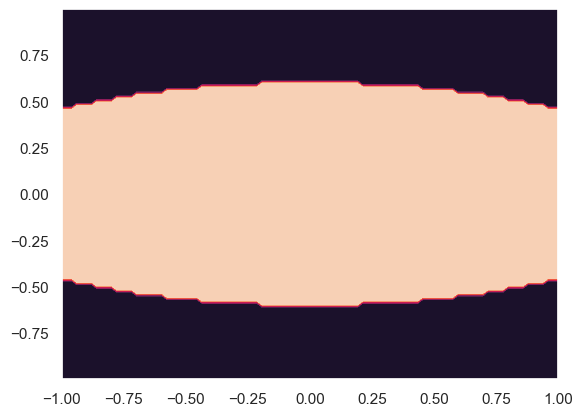

In [43]:
def plotDecisionBoundary(model,
                         X):
    
    xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
    ymin, ymax = np.min(X[:, 1]), np.max(X[:, 1])

    x, y = np.meshgrid(np.linspace(xmin, xmax, 100),
                       np.linspace(ymin, ymax, 100))
    
    z = np.c_[np.ravel(x), np.ravel(y)]
    predictions = model.predict(z)

    plt.contourf(x, y, predictions.reshape(x.shape))
    return predictions


preds = plotDecisionBoundary(model,
                     X)


### Don't visualize it like some plane seperating data in 3-d!!!
because If you do that just think this ->
there are 2 feauters x and y and a lable column (0 and 1)
Now visualize it in 3d, there will be bunch of data in x-y plane with z = 0 and z = 1
so you can visually seperate this data using a simple equation like z = w. But we can't 
classify it into two categories using something like this.

### So yeah ... congo

## Some test samples to plot in 3-d

In [31]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

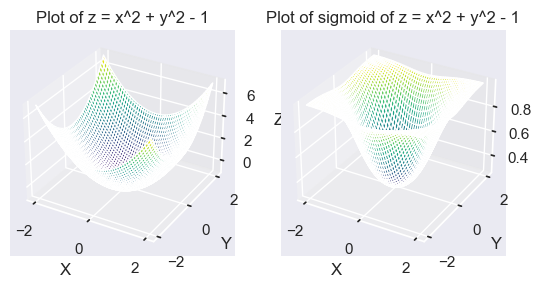

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate data
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = x**2 + y**2 - 1

# Apply sigmoid function
sigmoid_z = 1 / (1 + np.exp(-z))


# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plot of z = x^2 + y^2 - 1')


# Plot the sigmoid
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, sigmoid_z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plot of sigmoid of z = x^2 + y^2 - 1')

# Display the plot
plt.show()


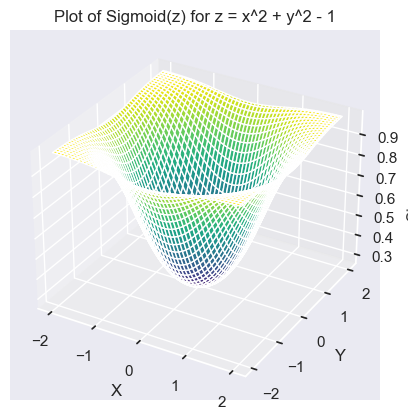

In [33]:
sigmoid_z = 1 / (1 + np.exp(-z))

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, sigmoid_z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Sigmoid(z)')
ax.set_title('Plot of Sigmoid(z) for z = x^2 + y^2 - 1')

# Display the plot
plt.show()